In [1]:
%matplotlib inline

import os
import re
import pandas as pd
import numpy as np
import shutil
import random
from pathlib import Path

from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
learner = load_learner('data/models', 'fastai_2.pkl')
learner

Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data\models;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data\models;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bi

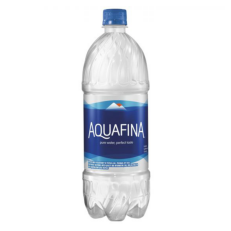

In [4]:
test_path = Path(os.getcwd())/"test_real"
img_show = plt.imread(test_path/"bottle_online.jpg")
plt.axis('off')
plt.imshow(img_show);

In [17]:
img = open_image(test_path/"bottle.jpg")
pred_class, pred_idx, outputs = learner.predict(img)

In [6]:
path = Path(os.getcwd())/"data"
data = ImageDataBunch.from_folder(path,test="test",bs=16)

In [11]:
pred_class

Category tensor(4)

In [21]:
data.classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [7]:
for pic in os.listdir(test_path):
    img = open_image(test_path/pic)
    pred_class, pred_idx, outputs = learner.predict(img)
    print(pic[:-4],":", data.classes[pred_idx],",",outputs)
    #img_show = plt.imread(test_path/pic)
    #plt.axis('off')
    #plt.imshow(img_show);

backpack1 : cardboard , tensor([9.9887e-01, 6.5254e-06, 1.9609e-06, 2.8435e-08, 1.7337e-04, 9.4403e-04])
backpack2 : cardboard , tensor([9.7102e-01, 8.8009e-04, 1.9685e-02, 9.5925e-08, 2.2924e-03, 6.1200e-03])
book1 : cardboard , tensor([7.8016e-01, 8.5617e-06, 2.6702e-05, 3.4158e-06, 3.2268e-04, 2.1948e-01])
book2 : cardboard , tensor([9.9865e-01, 2.7609e-05, 7.9275e-04, 1.4710e-09, 4.9502e-04, 3.1267e-05])
bottle1 : cardboard , tensor([8.7240e-01, 1.5674e-04, 1.1586e-03, 2.3123e-06, 1.5580e-03, 1.2473e-01])
bottle2 : metal , tensor([4.3263e-02, 1.0646e-01, 8.3938e-01, 1.5567e-07, 5.8016e-03, 5.0973e-03])
bottle_online : plastic , tensor([2.3051e-07, 2.4285e-05, 2.4204e-04, 3.2087e-06, 9.9973e-01, 2.0748e-07])
paper1 : cardboard , tensor([9.9075e-01, 1.6647e-03, 7.3485e-04, 6.6462e-07, 6.9412e-05, 6.7810e-03])
paper2 : cardboard , tensor([9.9955e-01, 2.4877e-04, 6.3607e-05, 7.6829e-07, 1.5460e-05, 1.1929e-04])
pencil1 : cardboard , tensor([8.0423e-01, 6.5476e-04, 1.7401e-04, 1.3473e-0